# Sentiment Analysis

IMPORTING THE DATA SCIENCE LIBRARIES

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import time

Importing the ML / Scikit learn EVERYTHING

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn.model_selection import train_test_split               #for splitting the data into test and training data
from sklearn.compose import ColumnTransformer                       #for transforming the columns
from sklearn.impute import SimpleImputer                             #for imputing the missing values
from sklearn.preprocessing import OneHotEncoder                      #one hot encoding
from sklearn.preprocessing import MinMaxScaler                        #standard scaling

from sklearn.datasets import load_diabetes

from sklearn.datasets import make_regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.svm import SVR
import plotly.express as px
import plotly.graph_objects as go
from sklearn.datasets import make_classification

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score                 # for accuracy score
from sklearn.model_selection import cross_val_score        # for cross validation score

from sklearn.linear_model import LinearRegression           # Import the LinearRegression class
from sklearn.metrics import mean_squared_error, r2_score    # to find out the error functions
from sklearn.preprocessing import PolynomialFeatures , StandardScaler   # for the polunomial features

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge   # ridge Regression
from sklearn.linear_model import LogisticRegression


from sklearn.tree import DecisionTreeClassifier                 #Decision tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier   # bagging and Boosting
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score   # different metrices to check how our model performed

Importing Deep learning Everything

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

Importing mathematical models

In [ ]:
# prompt: import the mathematical testing framewroks

# Importing mathematical models
import math

from scipy import stats

import scipy.stats as stats
import statsmodels.api as sm

# Loading and Information about the Dataset

In [ ]:

from google.colab import files    # we are importing the file from the device
uploaded = files.upload()

Categorical encoding has already being performed

In [ ]:
df=pd.read_csv('IMDB Dataset.csv')   #fitting the data in the df dataframe
df.head(5)



In [ ]:
df.shape


In [ ]:
df.describe()

In [ ]:
df.info()       # we are checking for the null values luckily we dont have any here

 There is no null data present in our Dataset

In [ ]:
df['review'][0]

# Text Cleaning

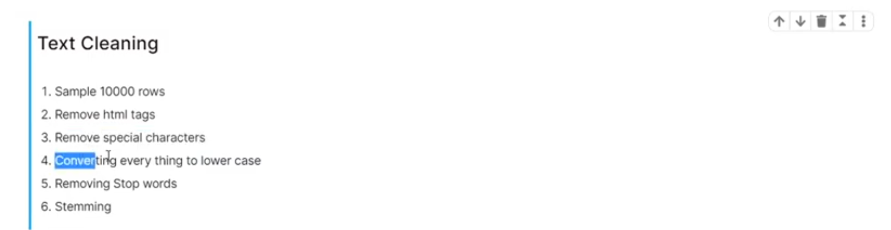

In [ ]:
df = df.sample(30000)

In [ ]:
df.shape

Replacing the positive Sentiment with 1 and negative sentiment with 0

In [ ]:
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'negative': 0})

To remove the HTML Tags

In [ ]:
import re
clean = re.compile('<.*?>')
re.sub(clean, '', df.iloc[2].review)

In [ ]:
# Function to clean html tags

def clean_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [ ]:
df['review'] = df['review'].apply(clean_html)

Converting everything to Lower Case

In [ ]:
# Function to Convert to lower Case

def convert_lower(text):
    return text.lower()

df['review'] = df['review'].apply(convert_lower)

Function to remove special Characters

In [ ]:
# Remove special Characters

def remove_special(text):
    x=''
    for i in text:
        if i.isalnum():
            x=x+i
        else:
            x=x+' '
    return x

In [ ]:
df['review'] = df['review'].apply(remove_special)

Functions to Remove Stop Words

In [ ]:
# Functions to Remove Stop Words

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords



In [ ]:
stopwords.words('english')

In [ ]:
def remove_stopwords(text):
    x = []
    for i in text.split():

        if i not in stopwords.words('english'):
            x.append(i)

    y = x[:]
    x.clear()
    return y

In [ ]:
df['review'] = df['review'].apply(remove_stopwords)

Performing Steming

In [ ]:
# Performing Stemming

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
y = []
def stem_words(text):
    for i in text:
        y.append(ps.stem(i))
    z = y[:]
    y.clear()
    return z

In [ ]:
stem_words(['loved', 'loving', 'love'])

In [ ]:
df['review'] = df['review'].apply(stem_words)

# Applying the joining function

In [ ]:
def join_words(list_input):
    return " ".join(list_input)

In [ ]:
df['review'] = df['review'].apply(join_words)

In [ ]:
df['review']

In [ ]:
X = df.iloc[:,0:1].values

In [ ]:
X.shape

# Vectorization ( BAG OF WORDS )

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Use CountVectorizer instead of CountVector
cv = CountVectorizer(max_features=10000)

In [ ]:
X=cv.fit_transform(df['review']).toarray()

In [ ]:
X.shape

# Target Column

In [ ]:
y = df.iloc[:, -1].values

In [ ]:
y

In [ ]:
y.shape

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

# Applying the Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


clf1 = GaussianNB()          # Applying 3 Naive Bayes
clf2 = MultinomialNB()
clf3 = BernoulliNB()


print (clf1.fit(X_train, y_train))       # fitting the data into the 3 Naive bayes
print (clf2.fit(X_train, y_train))
print (clf3.fit(X_train, y_train))

In [ ]:
y_pred1 = clf1.predict(X_test)     # Getting the predictions for all the 3 Classifications
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)      # Everyone has the Same shape  (2000,)

In [ ]:
y_pred1.shape

# Accuracy Score

In [ ]:
accuracy_score(y_test, y_pred1)

In [ ]:
accuracy_score(y_test, y_pred2)

In [ ]:
accuracy_score(y_test, y_pred3)